In [35]:
import numpy as np

import matplotlib.pyplot as plt
from astropy.table import Table
from astropy.io import fits
import astropy.constants as astcont
import astropy.units as u

import specreduce


In [62]:
sens = fits.open("Masters/gd71_sensfunc.fits")

In [63]:
sens[1].data

array([2908.38695335, 2909.68442911, 2910.98190487, ..., 9304.94244783,
       9306.23992359, 9307.53739935])

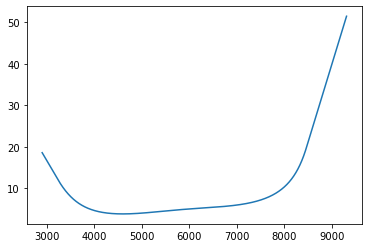

In [64]:
plt.plot(sens[1].data, sens[2].data)
plt.show()

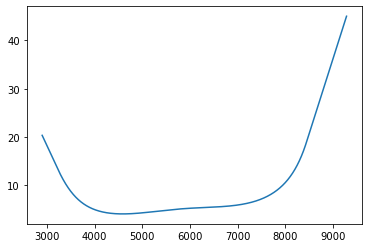

In [65]:
bdsens = fits.open("../../20190607_ggw/pypeit/Masters/bd_28_4211_sensfunc.fits")
plt.plot(bdsens[1].data, bdsens[2].data)
plt.show()

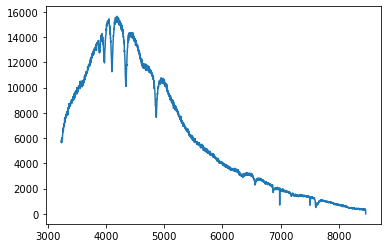

In [56]:
gd71 = Table.read("Science/spec1d_skyobs0069-GD71_Blue_Channel_2019Oct06T105038.000.fits")
plt.plot(gd71['OPT_WAVE'], gd71['OPT_COUNTS'])
plt.show()

In [51]:
low = Table.read("Science/spec1d_skyobs0049-sky_az270_el20_Blue_Channel_2019Oct06T095433.000.fits")
high = Table.read("Science/spec1d_skyobs0053-sky_az270_el47_Blue_Channel_2019Oct06T100505.000.fits")

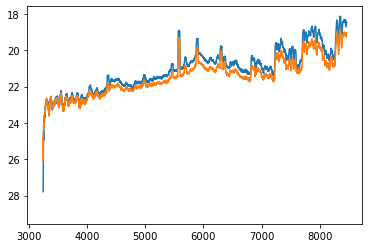

In [52]:
sens = data['OPT_FLAM'] / data['OPT_COUNTS']
cl2 = low['OPT_WAVE'] ** 2 / astcont.c.to('AA/s').value
lowflux = -2.5 * np.log10(cl2 * 1e-17 * sens * low['BOX_COUNTS_SKY'] / (low['BOX_NPIX']*5*0.6)) - 48.6
highflux = -2.5 * np.log10(cl2 * 1e-17 * sens * high['BOX_COUNTS_SKY'] / (high['BOX_NPIX']*5*0.6)) - 48.6
plt.plot(low['OPT_WAVE'], lowflux)
plt.plot(high['OPT_WAVE'], highflux)
plt.gca().invert_yaxis()
plt.show()

In [53]:
def load_sky_spectrum(fitsfile, pixscale=0.6, slitwidth=5., zeropoint=48.6):
    """
    Load a Pypeit-reduced 1D sky spectrum and return wavelength in Angstroms and flux in ABmag/arcsec**2

        fitsfile: string - filename of FITS spectrum
        pixscale: float - spatial pixel scale (arcsec/pixel)
        slitwidth: float - width of the slit (arcsec)
        zeropoint: float - zeropoint for AB mag system (AB mag)
    """
    spec = Table.read(fitsfile)
    # we get the calibration function from the ratio of FLAM to COUNTS
    sensfunc = spec['OPT_FLAM'] / spec['OPT_COUNTS']
    # need lambda^2/c to convert to FNU
    cl_sq = spec['OPT_WAVE'] ** 2 / astcont.c.to('AA/s').value
    # we use the boxcar sky counts to make the extraction pixel area more deterministic
    abmag = -2.5 * np.log10(cl_sq * 1e-17 * sensfunc * spec['BOX_COUNTS_SKY'] / (spec['BOX_NPIX'] * slitwidth * pixscale)) - zeropoint
    wave = spec['OPT_WAVE'] * u.Angstrom
    abmag = abmag * u.ABmag
    return wave, abmag

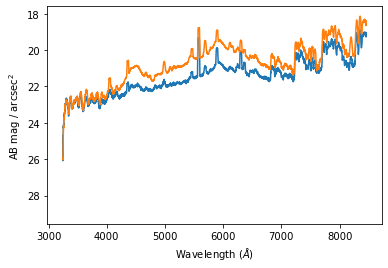

In [59]:
w, a = load_sky_spectrum("Science/spec1d_skyobs0053-sky_az270_el47_Blue_Channel_2019Oct06T100505.000.fits")
wt, at = load_sky_spectrum("Science/spec1d_skyobs0031-sky_az352_el20_Blue_Channel_2019Oct06T090420.000.fits")
plt.plot(w, a)
plt.plot(wt, at)
plt.gca().invert_yaxis()
plt.xlabel("Wavelength $(\AA)$")
plt.ylabel("AB mag / arcsec$^2$")
plt.show()

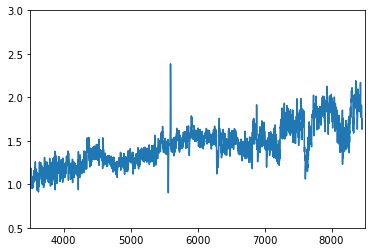

In [18]:
plt.plot(low['OPT_WAVE'], lowflux/highflux)
plt.xlim(3500, 8500)
plt.ylim(0.5, 3)
plt.show()

In [34]:
50 * 1.725 * 5 * 10.2

4398.75